## My First Task : Prediction using Supervised ML
### Graduate Rotational Internship Program at The Spark Foundation
##### Statement  : What will be predicted score if a student studies for 9.25 hrs/ day?
### By Sudarshan Dev Surywanshi


## 1. Importing Required Libraries

In [370]:
import pandas as pd # Load the Pandas libraries with alias 'pd' 
import numpy as np # NumPy is a Python library used for working with arrays
import matplotlib.pyplot as plt # visualization library in Python for 2D plots of arrays

In [371]:
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

## 2.Dataset imported

In [372]:
dataset_link = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(dataset_link)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25



## 3.Exploratory Data Analysis | Introduction to Exploratory 
#### EDA is a process of examining the data, extracting insights of the data

In [373]:
dataset.shape #Rows = 25, Columns (Hours & Scores) = 2

(25, 2)

In [374]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###### 25 Rows from 0 to 24 and total two Columns with no null 

In [375]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Here we have some information that if the students will take minimum 1.10 hours so they will obtain approximate minimum score 17 and if the students will take maximum 9.2 hours then they will obtain approximate maximum score 95.0

In [376]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [377]:
dataset.isnull().values.any()

False

######  False, No missing value occuring

In [378]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 4.Visualisation 
#### a) UNIVARIATE DENSITY PLOT

C:\Users\User\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

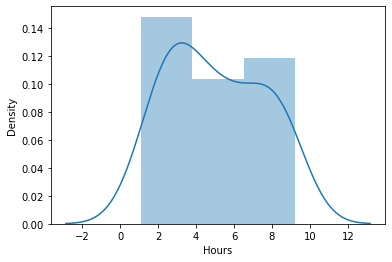

In [379]:
sns.distplot(dataset['Hours'])


C:\Users\User\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

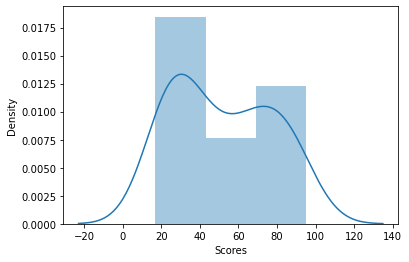

In [380]:
sns.distplot(dataset['Scores'])

#### b). BIVARIATE LINEAR REGRESSION PLOT

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

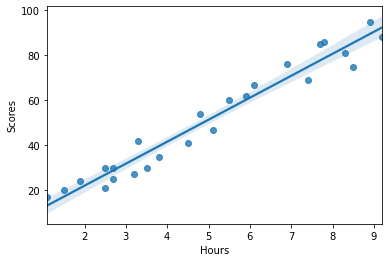

In [381]:
sns.regplot(x="Hours",y="Scores",data=dataset)

C:\Users\User\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


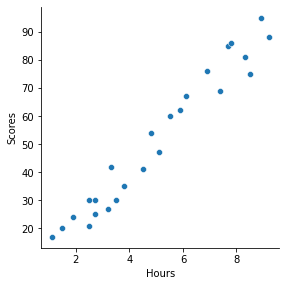

In [382]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(dataset, x_vars=['Hours'], 
             y_vars='Scores', size=4, aspect=1, kind='scatter')
plt.show()

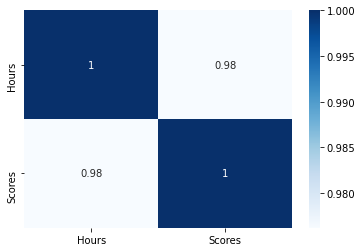

In [383]:
# Visualizing the data using heatmap
sns.heatmap(dataset.corr(), cmap="Blues", annot = True)
plt.show()

In [384]:
# Creating X and y
X = dataset['Hours']
y = dataset['Scores']

In [385]:

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

In [386]:
dataset.sort_values(by=['Hours', 'Scores']).values

array([[ 1.1, 17. ],
       [ 1.5, 20. ],
       [ 1.9, 24. ],
       [ 2.5, 21. ],
       [ 2.5, 30. ],
       [ 2.7, 25. ],
       [ 2.7, 30. ],
       [ 3.2, 27. ],
       [ 3.3, 42. ],
       [ 3.5, 30. ],
       [ 3.8, 35. ],
       [ 4.5, 41. ],
       [ 4.8, 54. ],
       [ 5.1, 47. ],
       [ 5.5, 60. ],
       [ 5.9, 62. ],
       [ 6.1, 67. ],
       [ 6.9, 76. ],
       [ 7.4, 69. ],
       [ 7.7, 85. ],
       [ 7.8, 86. ],
       [ 8.3, 81. ],
       [ 8.5, 75. ],
       [ 8.9, 95. ],
       [ 9.2, 88. ]])

## 5.Train and Test Split

In [387]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)                                                     

In [388]:
# Take a look at the train dataset
X_train
y_train

array([88, 41, 30, 86, 21, 47, 30, 17, 24, 67, 27, 85, 30, 95, 60, 75, 81],
      dtype=int64)

###### X_train & y_train data looks like this after splitting.

## 6.(a) Building and training the model

##### We need to import the statsmodel package to build the model
##### equation y =  mX + c
##### Importing Statsmodels.api library from Statsmodel package

In [389]:
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [390]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

array([1.49514211, 9.87171443])

In [391]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

C:\Users\User\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.15e-11
Time:                        22:08:56   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
x1             9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Coefficient for Hours : 9.87 and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.

###### R-squared value is 0.957, which means that 95.7% of the Scores variance can be explained by the Hours column using this line.

###### Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.



###### Straight line equation Y =mX + c

###### Scores = 9.871 * Hours + 1.495

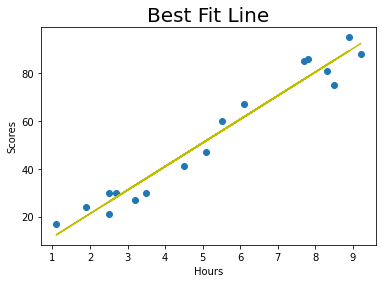

In [392]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495 + 9.871*X_train, 'y')
plt.title("Best Fit Line", fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Linear regression model using training data

## (b) Residual Analysis
###### Error = Actual y value - y predicted value

In [393]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\User\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


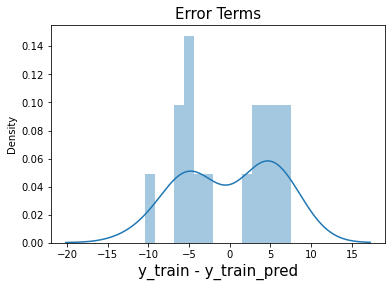

In [394]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

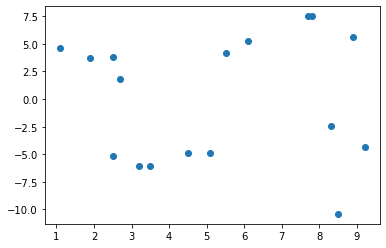

In [395]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## (c) Predictions on the Test data 

In [396]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

## (d) R2_square

In [397]:
# Importing r2_square
from sklearn.metrics import r2_score

In [398]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9309458862687439

The R² value by using the above code = 0.930 &
If we can remember from the training data, the R² value = 0.957

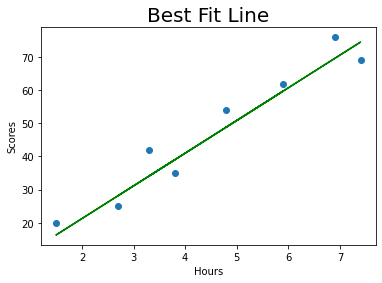

In [399]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'g')
plt.title("Best Fit Line", fontsize = 20)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## 7. By Sklearn Model

In [400]:
#Importing the sklearn package to build the model
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)                                                                

For simple linear regression, we need to add a column to perform the regression fit properly

In [401]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(17, 1)
(8, 1)


In [402]:
#importing the LinearRegression library from the sklearn
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [403]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 1.4951421092364043
Slope : [9.87171443]


#### Straight line equation 
##### Y =mX + c
##### Scores = 9.871 * Hours + 1.495 

In [404]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [405]:
# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9570735354094693
0.9309458862687439


In [406]:

# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': y_test_lm, 'Predicted': y_test_pred})  
dataset.head(5)

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714


#### Plotting the Bar graph to depict the difference between the actual and predicted value

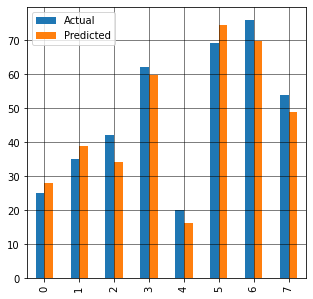

In [407]:
dataset.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

#### Testing the model with our own data

In [408]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred_score = lm.predict(test)
print("Study Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

Study Hours = 9.25
Predicted Score = 92.80850057353504


In [409]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R-2:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 25.678419573283847
R-2: 0.9309458862687439


###### R-2 = 0.9309458862687439 which is really a better score for this model to make best fit.
    

### Observations:
Sucessfully Predicted using Supervised ML from Student's Study Hours, Scores dataset.

Visualisation : Univariate(Density Plot) & Bivariate Analysis(Reg Plot, PairPlot, Heatmap).

For Model Building : Used Statsmodel & Sklearn.

Both models have the same accuracy of 0.93.

Finally predicted that they will obtain a 92.80 score if a student studies for 9.25 Hour/Day.
